# Zadanie 1

## Wczytywanie potrzebnych bibliotek  

In [3]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

[0.997, 0.076, 0.046, 0.046, 0.047]


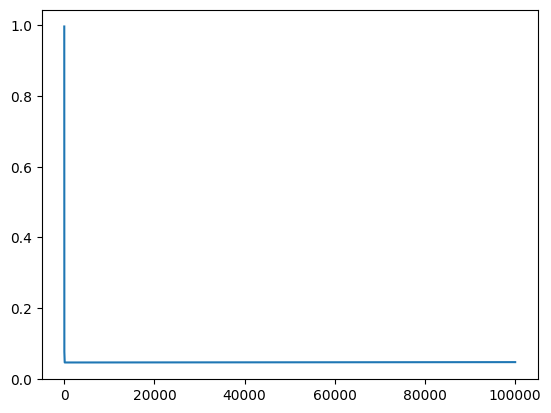

In [4]:

liczba_stopni = [1,20,100,1000,100000]
alfa = 0.05
n = 50
liczba_symulacji = 1000
moce_testow = []

# Zebranie danych z rozkladu t - studenta

for stopien in liczba_stopni:
    odrzucenie_H0 = 0
    for K in range(liczba_symulacji):
        probka = stats.t.rvs(stopien,size=n)
        # Standaryzacja danych i guess
        stand_probka = (probka - np.mean(probka))/np.std(probka)
        # Bede badal odsetek odrzucenia H0 przy 1000 symulacji 
        # Jezeli pvalue jest < 0.05 to sa podstawy do orzucenia H0 wiec =+ zmienna 
        if stats.shapiro(stand_probka).pvalue < alfa : 
            odrzucenie_H0 += 1
    
    # Obliczamy ostateczny odsetek odrzucenia H0
    moce_testow.append(odrzucenie_H0/liczba_symulacji)


print(moce_testow)
plt.plot(liczba_stopni,moce_testow)

